In [1]:
%pip install matplotlib
%pip install pandas 
%pip install numpy
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health',
                'Technology', 'Art', 'Finance', 'Politics', 'Sports', 'Pets', 'Environment']

n = 1090  
data = {
    'Date': pd.date_range('2021-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n)
}

df = pd.DataFrame(data)

print(df)

           Date    Category  Likes
0    2021-01-01     Culture    371
1    2021-01-02        Pets   5226
2    2021-01-03      Family   9433
3    2021-01-04      Sports   1728
4    2021-01-05  Technology   1271
...         ...         ...    ...
1085 2023-12-22     Finance     63
1086 2023-12-23      Travel   6715
1087 2023-12-24      Family   7517
1088 2023-12-25      Family   3976
1089 2023-12-26      Travel   6802

[1090 rows x 3 columns]


In [4]:
print("DataFrame Head:")
print(df.head())

print("\nDataFrame Information:")
print(df.info())

print("\nDataFrame Description:")
print(df.describe())

print("\nCount of each 'Category' element:")
print(df['Category'].value_counts())

DataFrame Head:
        Date    Category  Likes
0 2021-01-01     Culture    371
1 2021-01-02        Pets   5226
2 2021-01-03      Family   9433
3 2021-01-04      Sports   1728
4 2021-01-05  Technology   1271

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1090 non-null   datetime64[ns]
 1   Category  1090 non-null   object        
 2   Likes     1090 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 21.4+ KB
None

DataFrame Description:
                      Date        Likes
count                 1090  1090.000000
mean   2022-06-29 12:00:00  4984.158716
min    2021-01-01 00:00:00     1.000000
25%    2021-09-30 06:00:00  2645.500000
50%    2022-06-29 12:00:00  4969.500000
75%    2023-03-28 18:00:00  7274.500000
max    2023-12-26 00:00:00  9989.000000
std          

In [5]:
df.dropna(inplace=True)

df.drop_duplicates(inplace=True)

df['Date'] = pd.to_datetime(df['Date'])

df['Likes'] = df['Likes'].astype(int)

print("Cleaned DataFrame:")
print(df)

Cleaned DataFrame:
           Date    Category  Likes
0    2021-01-01     Culture    371
1    2021-01-02        Pets   5226
2    2021-01-03      Family   9433
3    2021-01-04      Sports   1728
4    2021-01-05  Technology   1271
...         ...         ...    ...
1085 2023-12-22     Finance     63
1086 2023-12-23      Travel   6715
1087 2023-12-24      Family   7517
1088 2023-12-25      Family   3976
1089 2023-12-26      Travel   6802

[1090 rows x 3 columns]


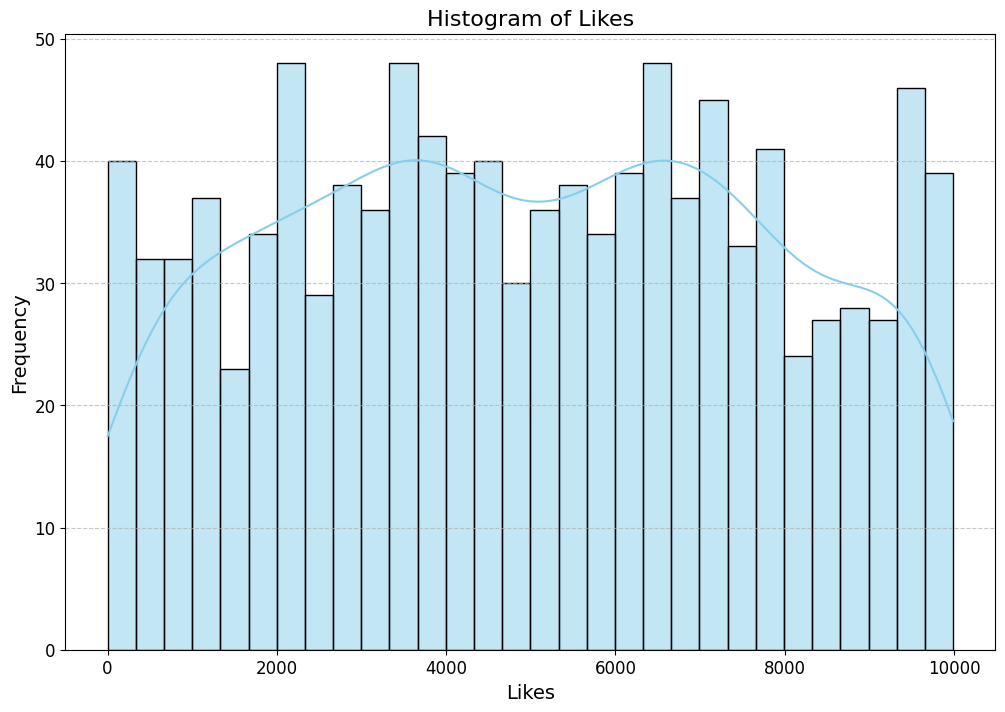

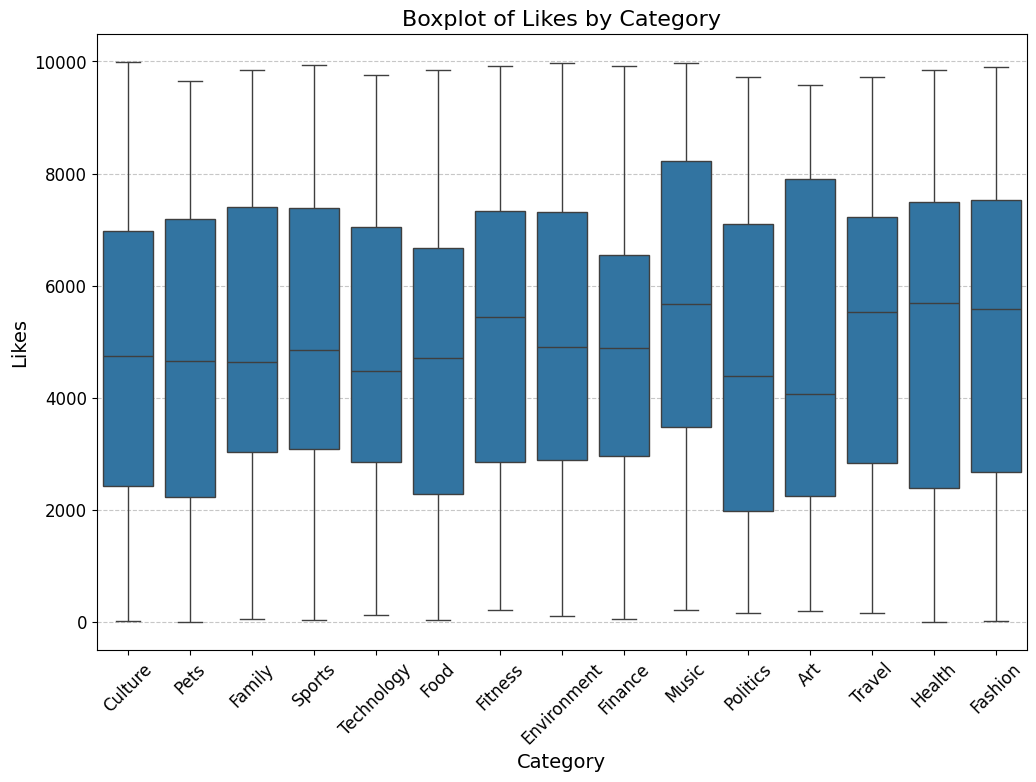

Mean of 'Likes' category: 4984

Mean of 'Likes' for each Category:
Category
Music          5701.0
Health         5285.0
Fitness        5261.0
Fashion        5129.0
Sports         5078.0
Travel         5077.0
Family         5022.0
Environment    5015.0
Finance        4888.0
Technology     4863.0
Culture        4846.0
Art            4748.0
Food           4682.0
Politics       4660.0
Pets           4607.0
Name: Likes, dtype: float64


In [6]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Likes'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Likes', fontsize=16)
plt.xlabel('Likes', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Likes', data=df)
plt.title('Boxplot of Likes by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Likes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("Mean of 'Likes' category:", round(df['Likes'].mean()))

print("\nMean of 'Likes' for each Category:")
print(df.groupby('Category')['Likes'].mean().round().sort_values(ascending=False))

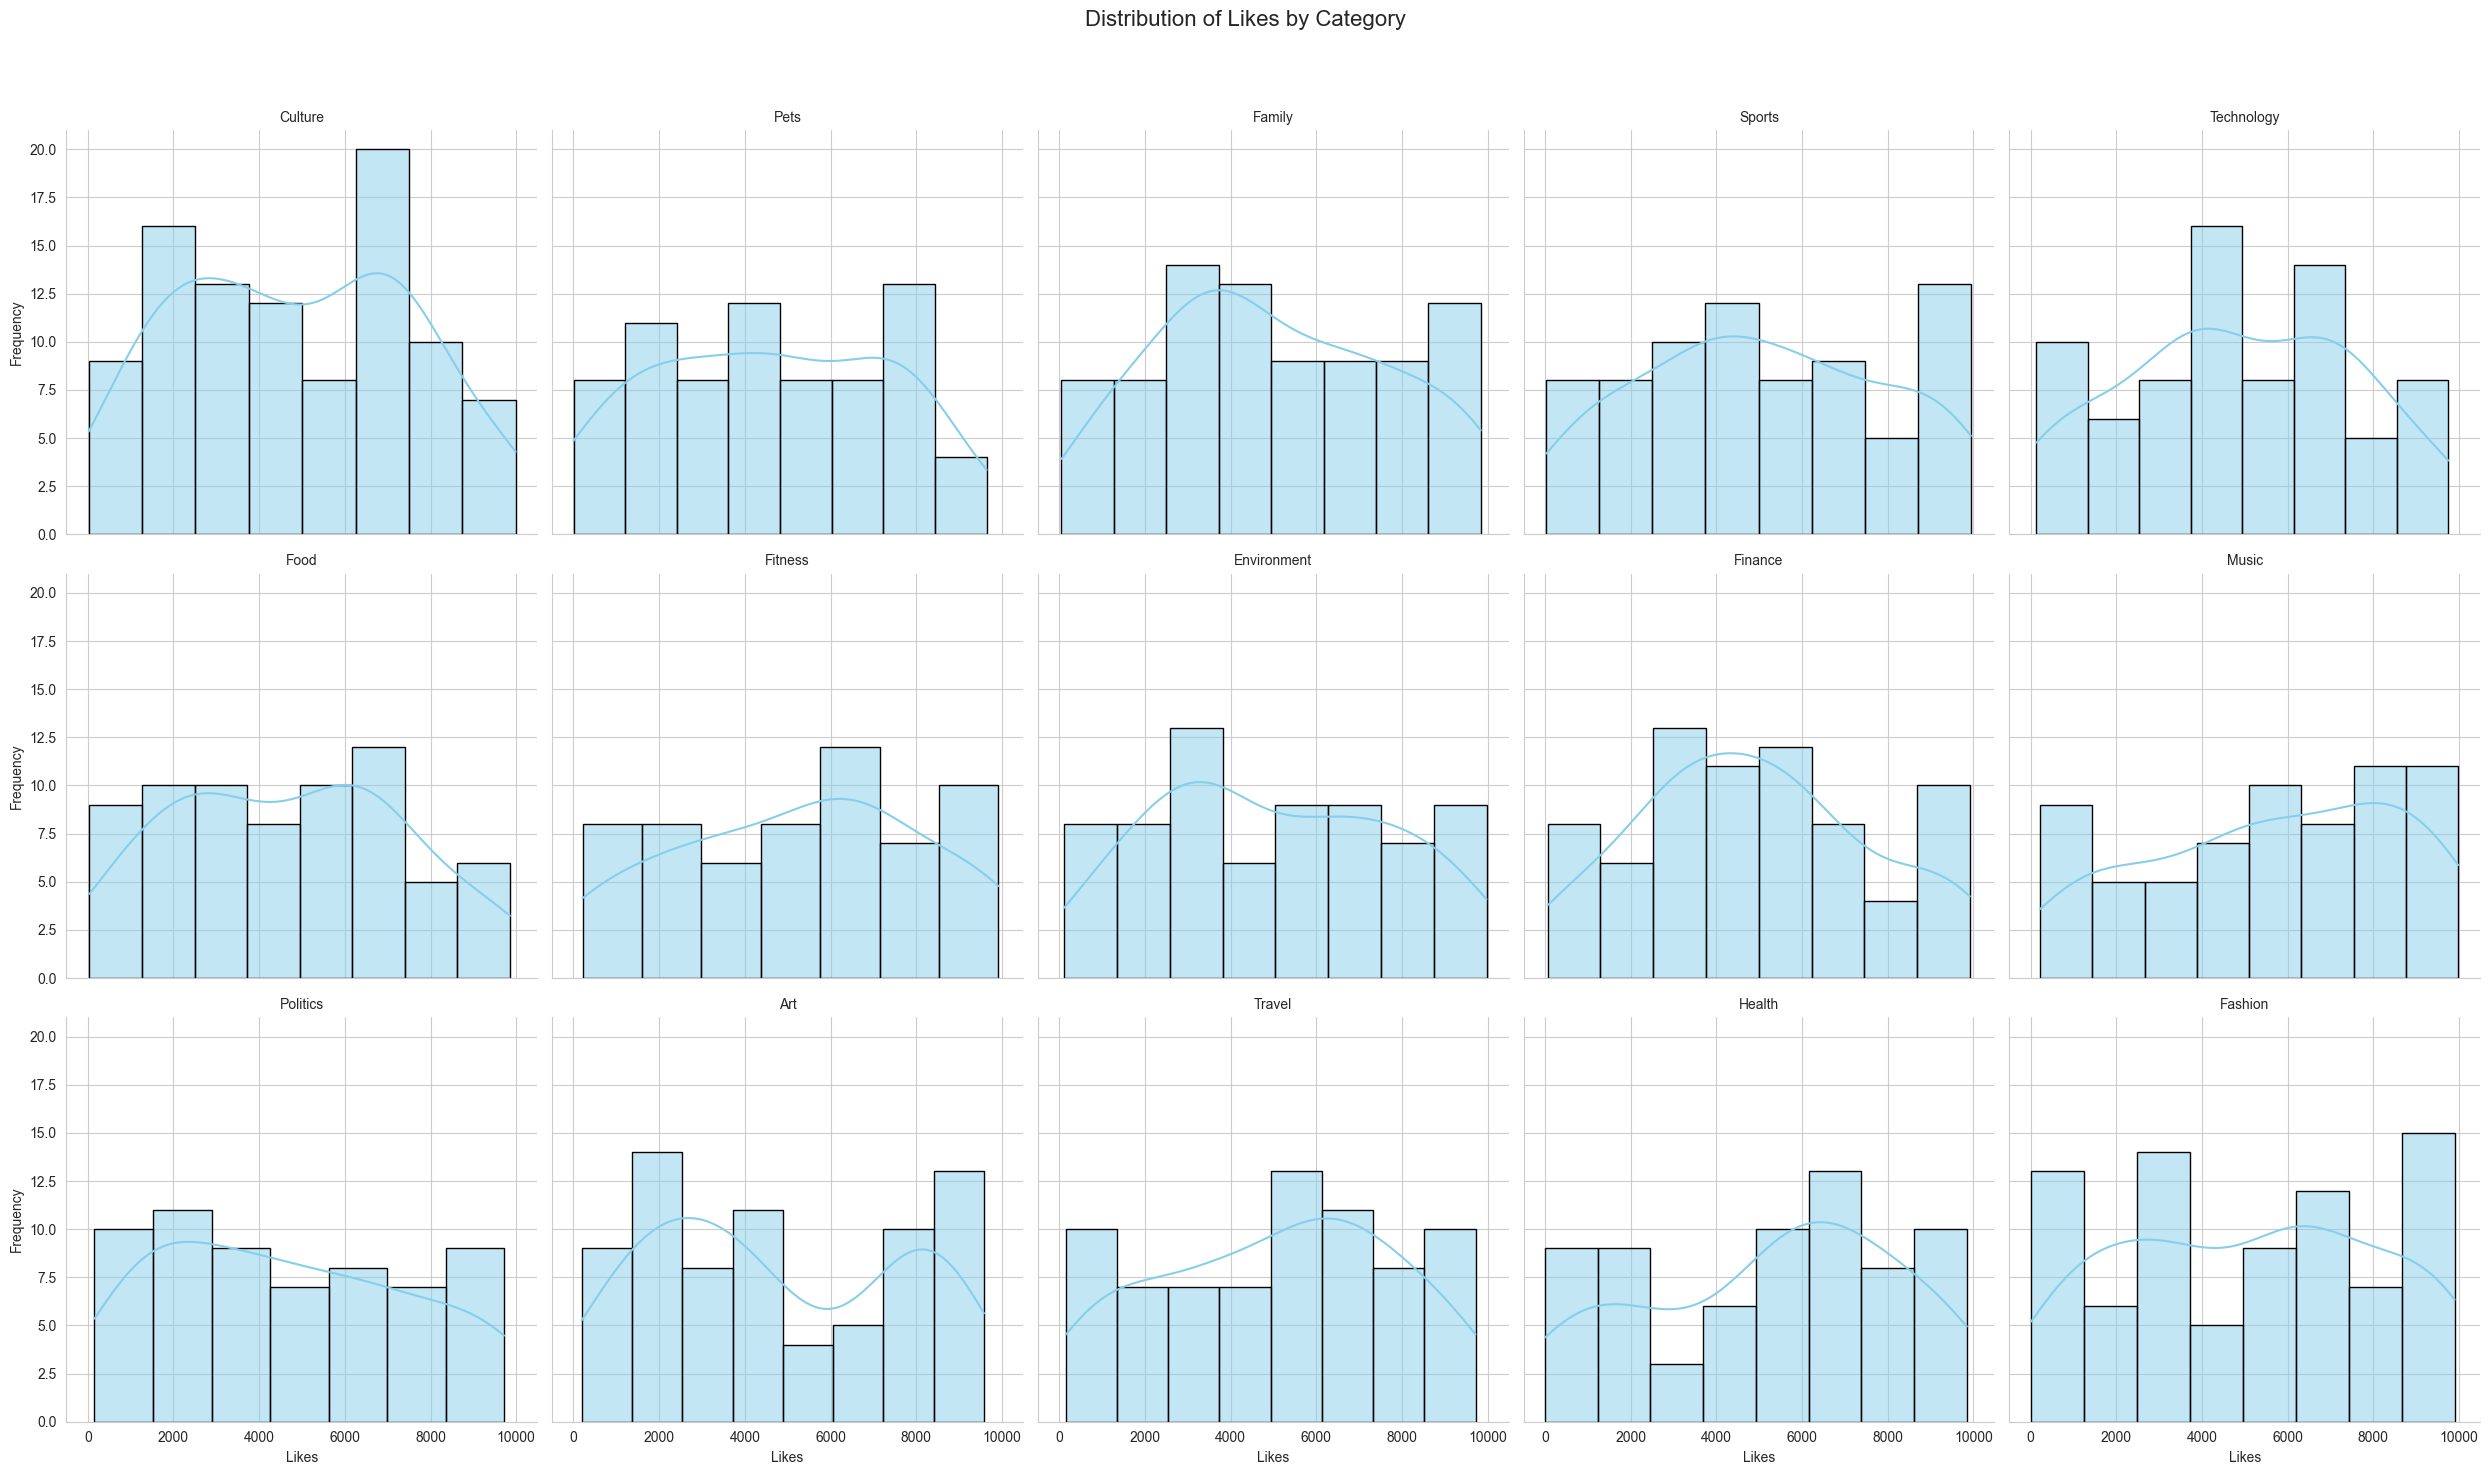

In [7]:

sns.set_style("whitegrid")

g = sns.FacetGrid(df, col='Category', col_wrap=5, height=5, aspect=1)
g.map(sns.histplot, 'Likes', kde=True, color='skyblue', edgecolor='black')

g.set_titles("{col_name}")
g.set_axis_labels("Likes", "Frequency")

plt.subplots_adjust(top=0.9)  # Adjust top margin for titles
plt.suptitle("Distribution of Likes by Category", fontsize=16)  # Main title
plt.xticks(fontsize=10)  # Adjust x-axis tick font size
plt.yticks(fontsize=10)  # Adjust y-axis tick font size

plt.show()

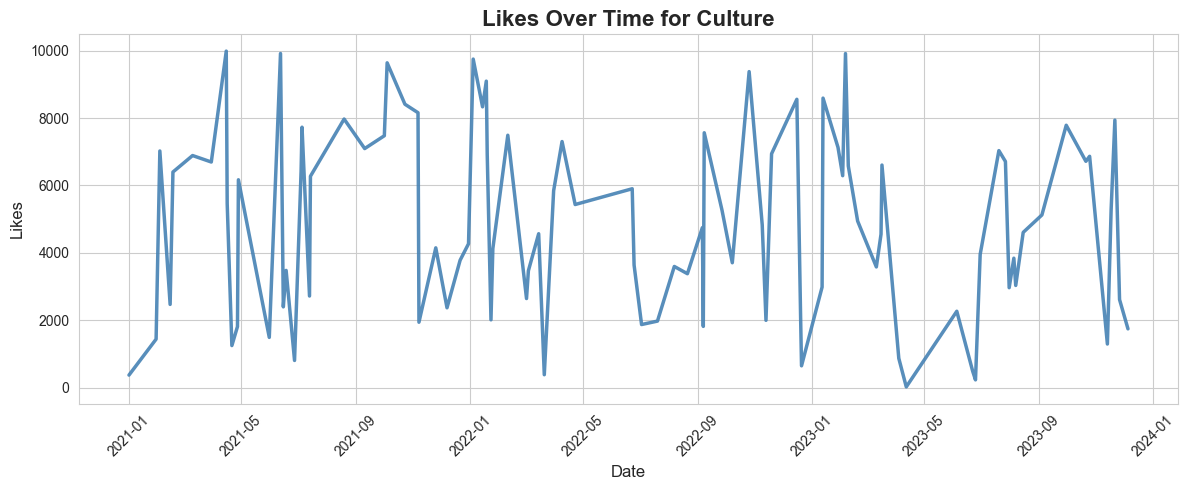

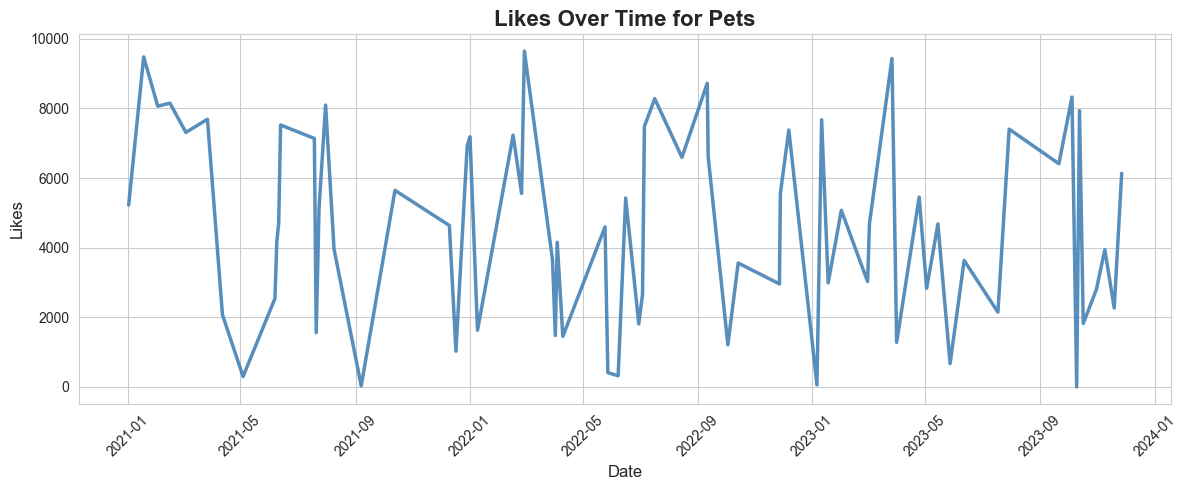

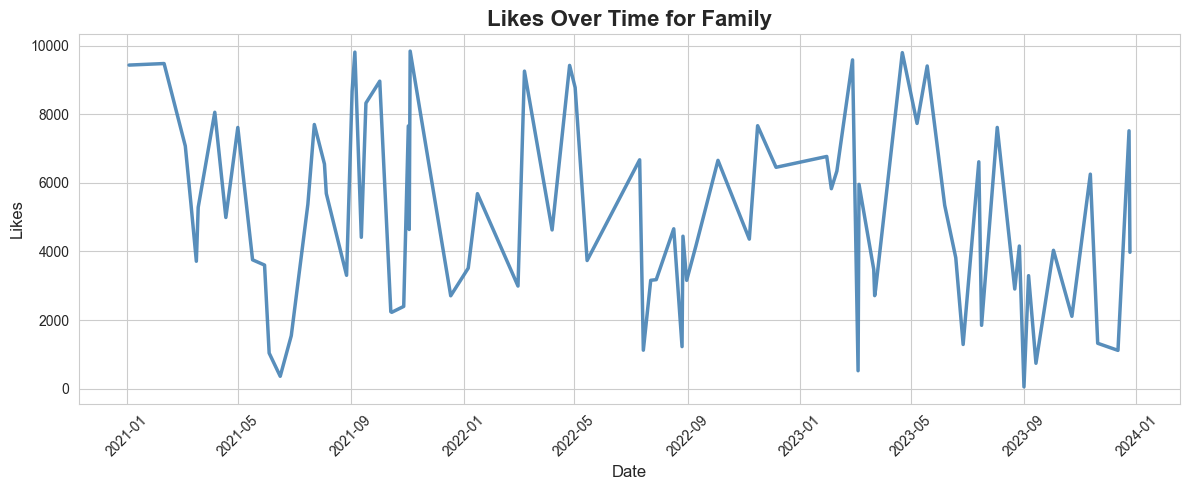

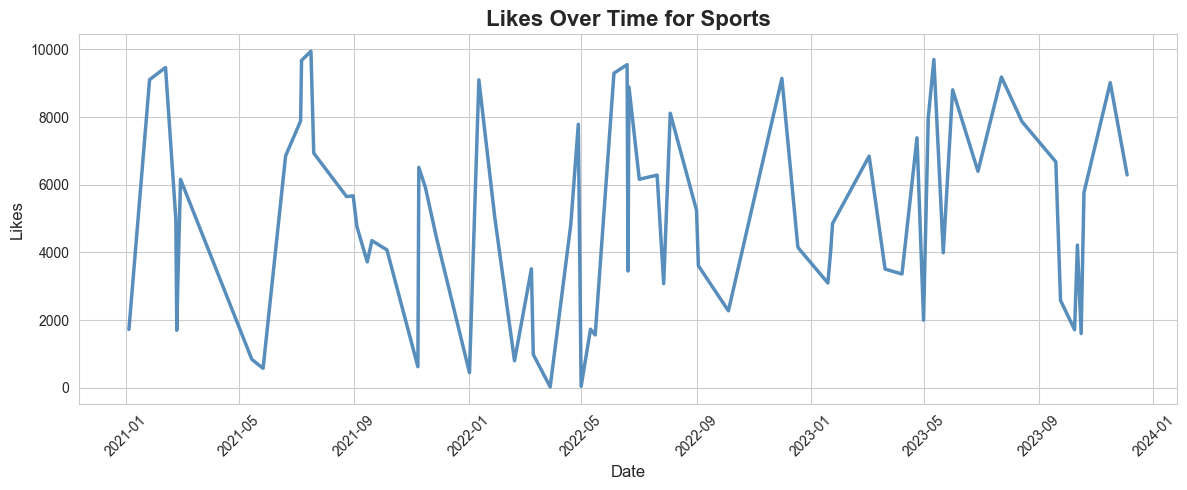

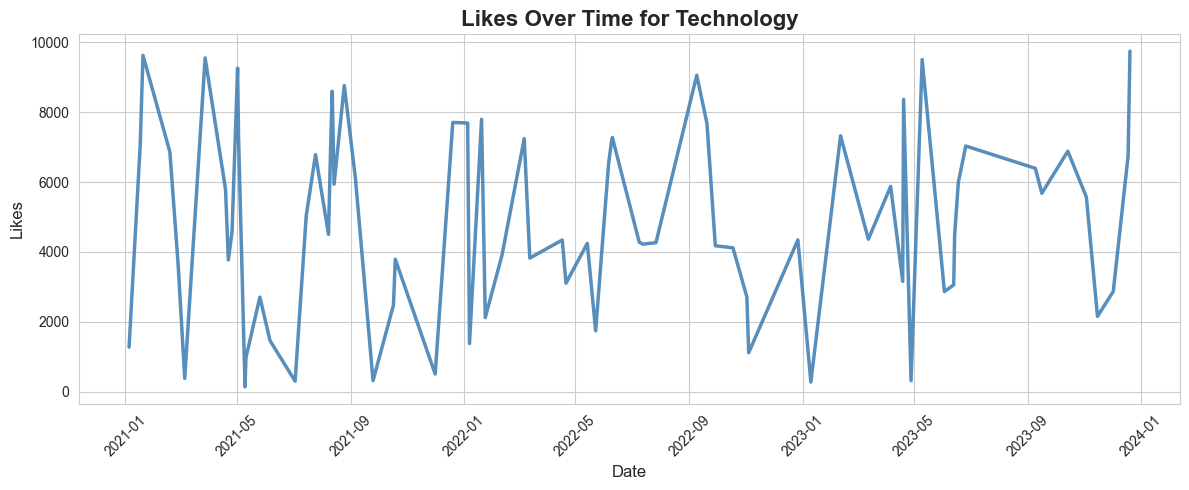

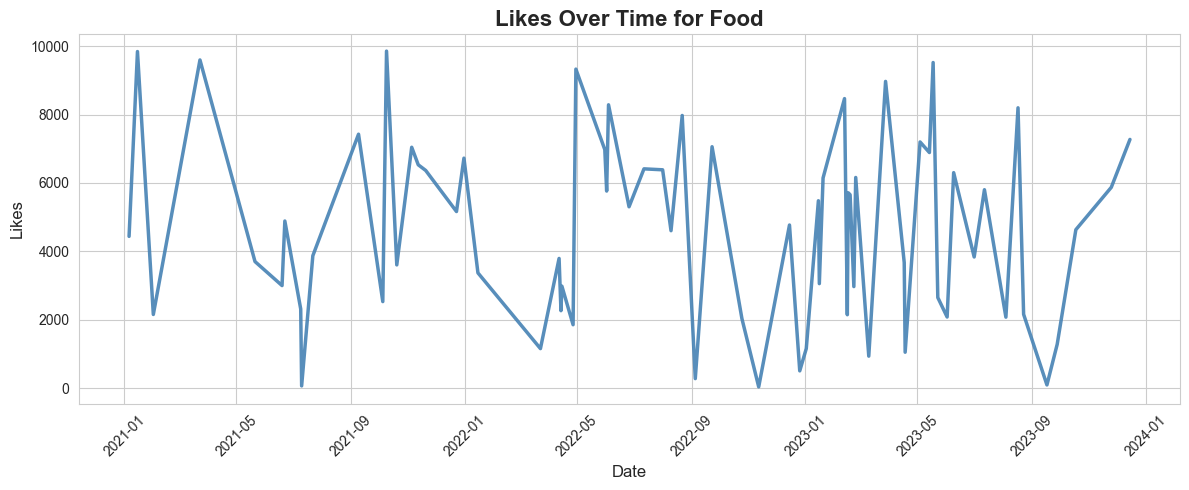

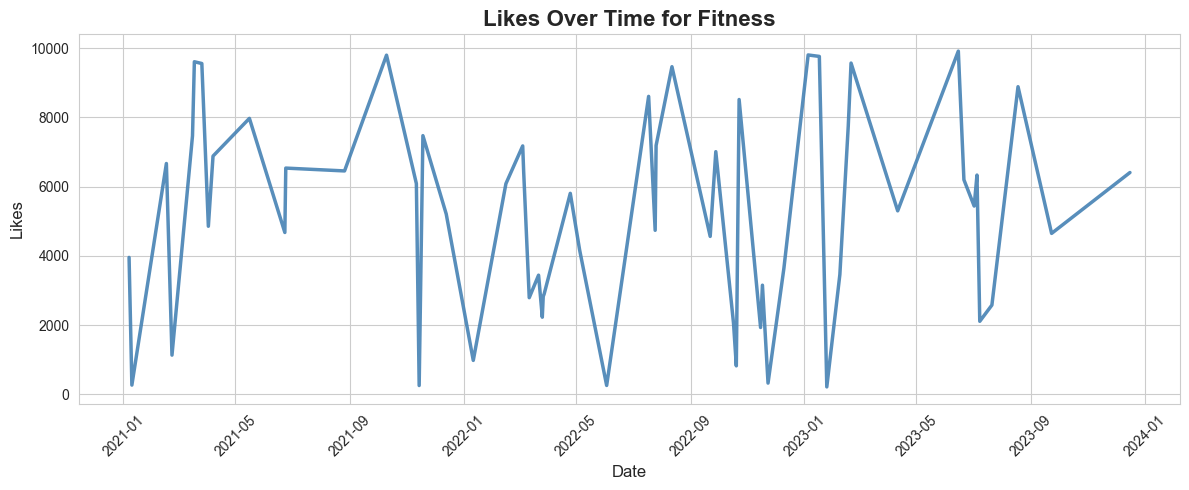

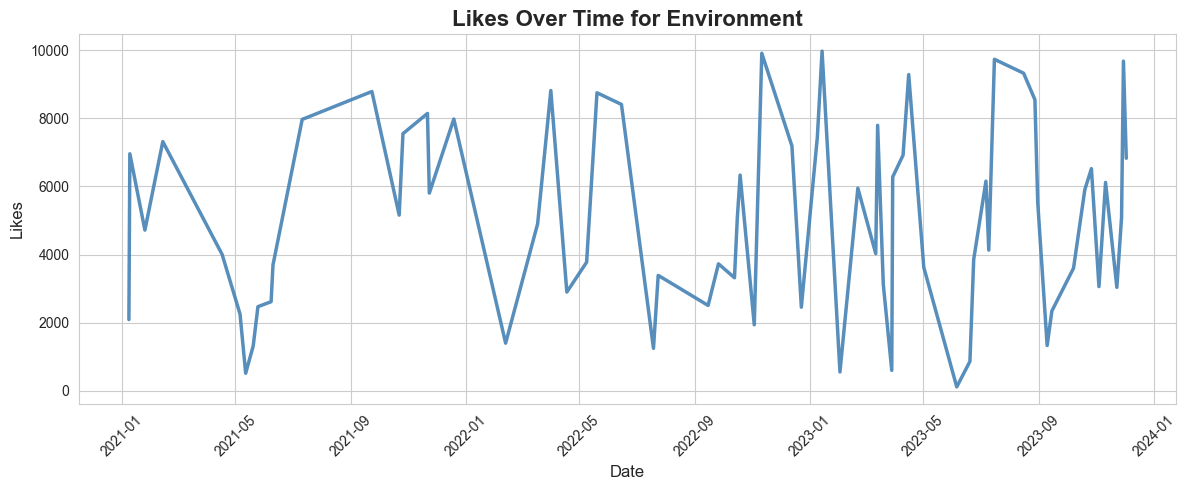

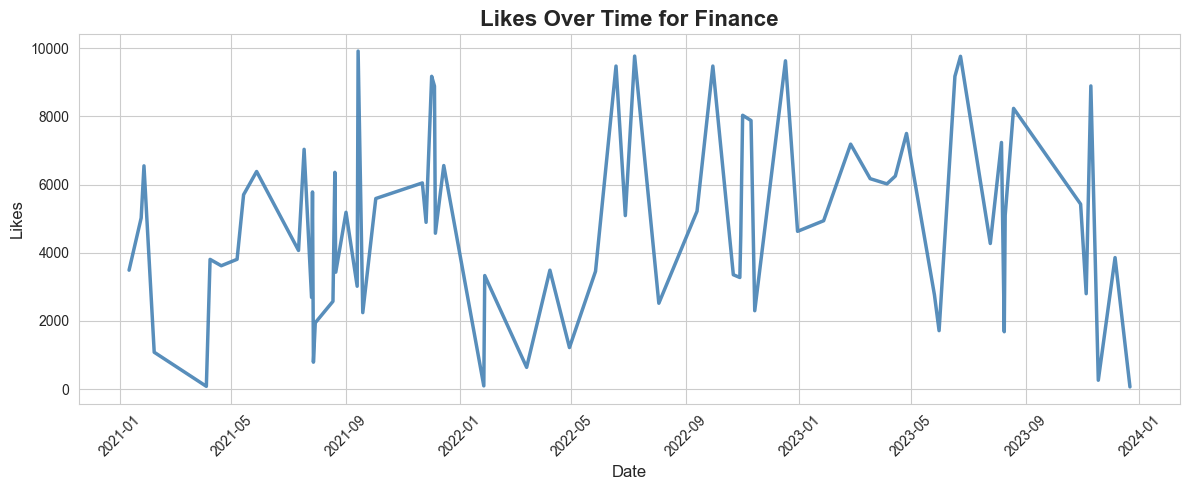

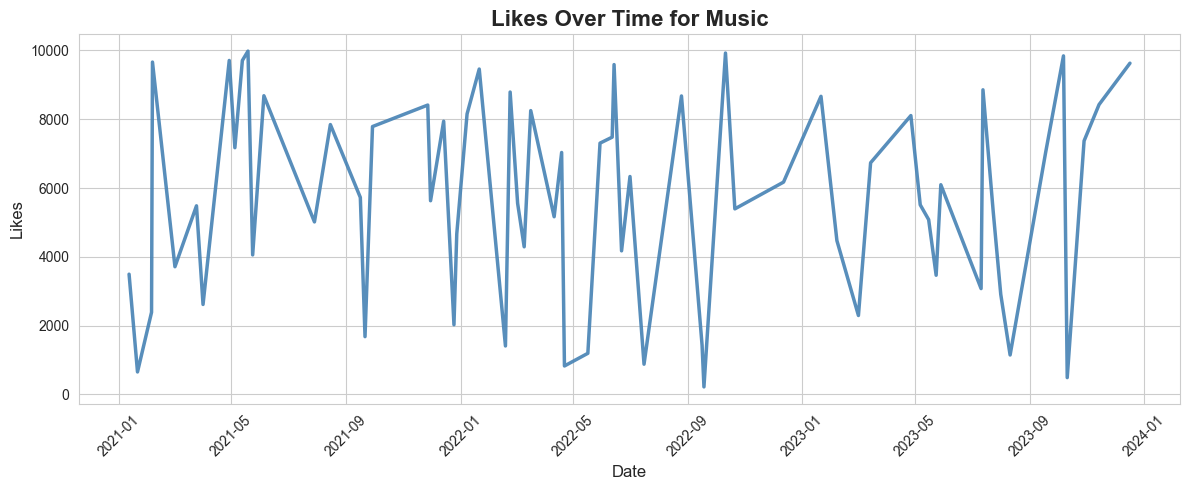

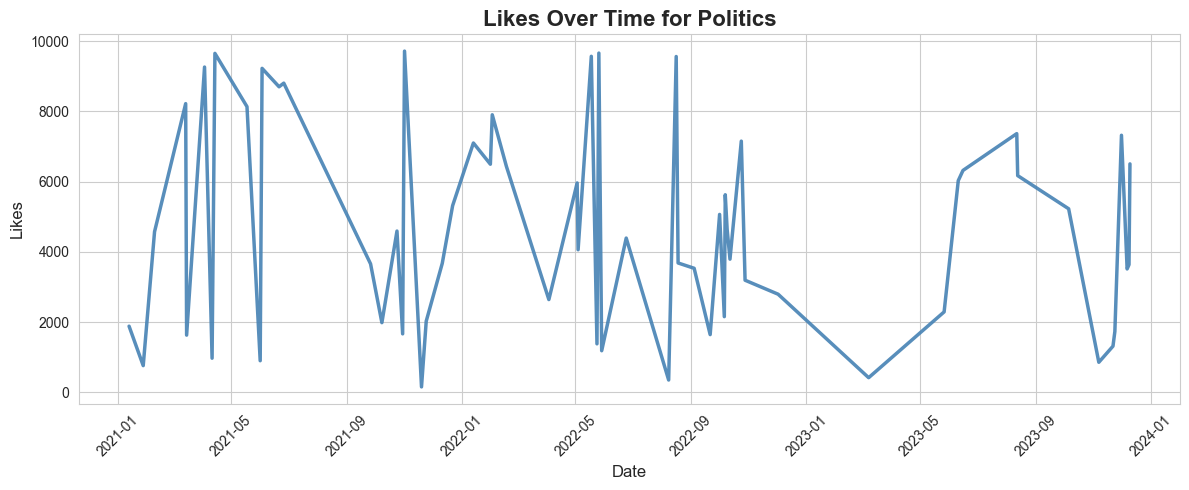

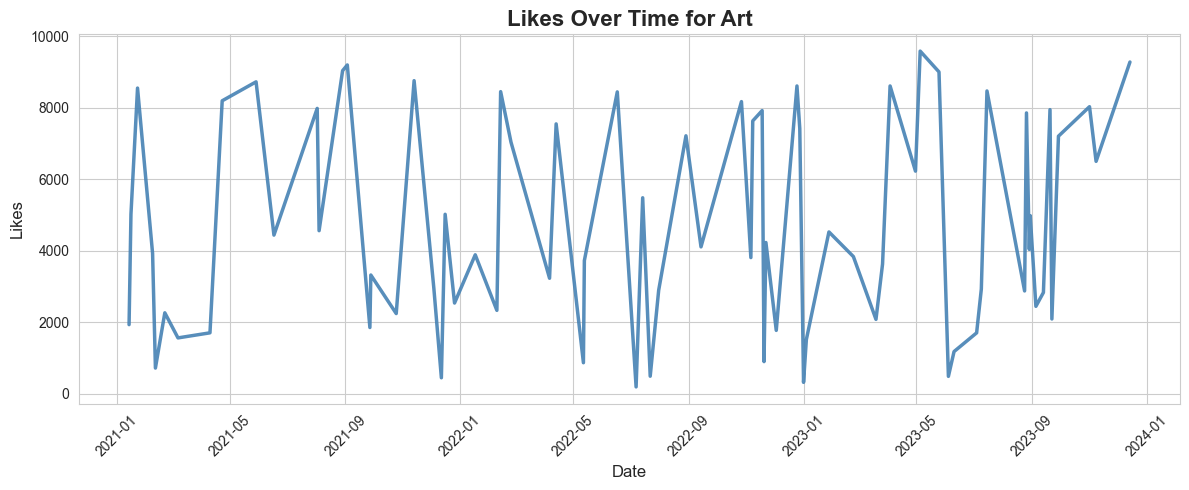

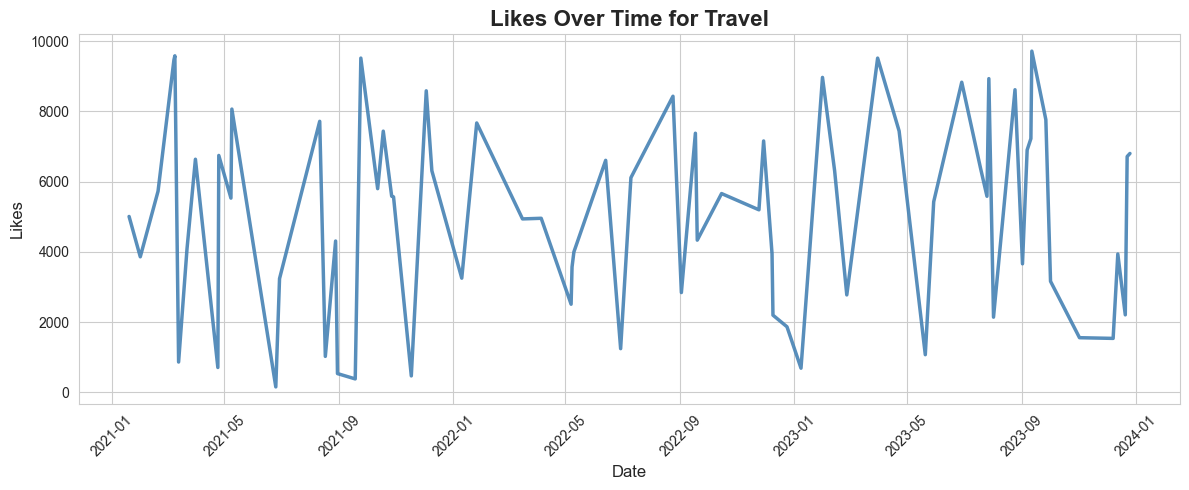

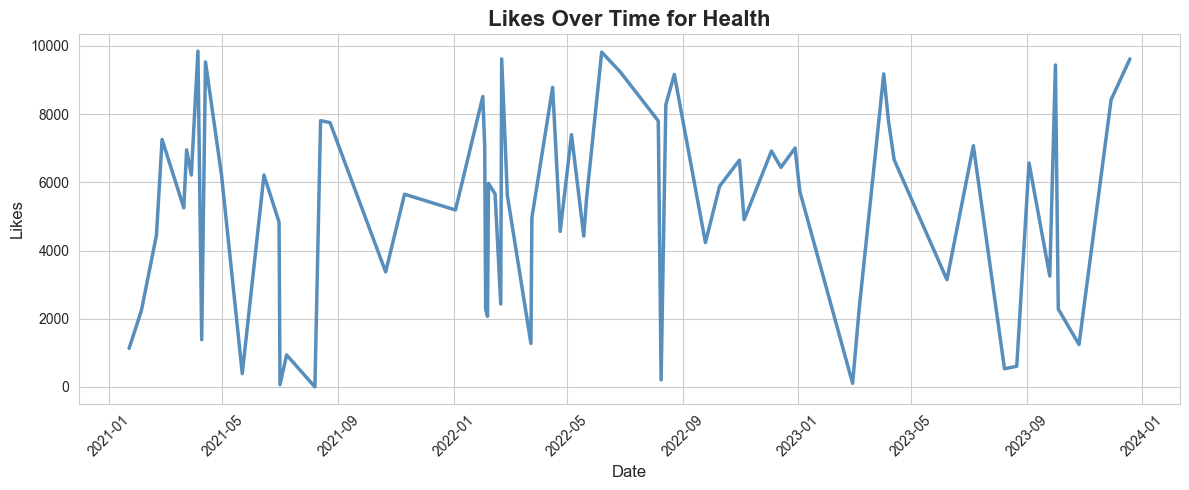

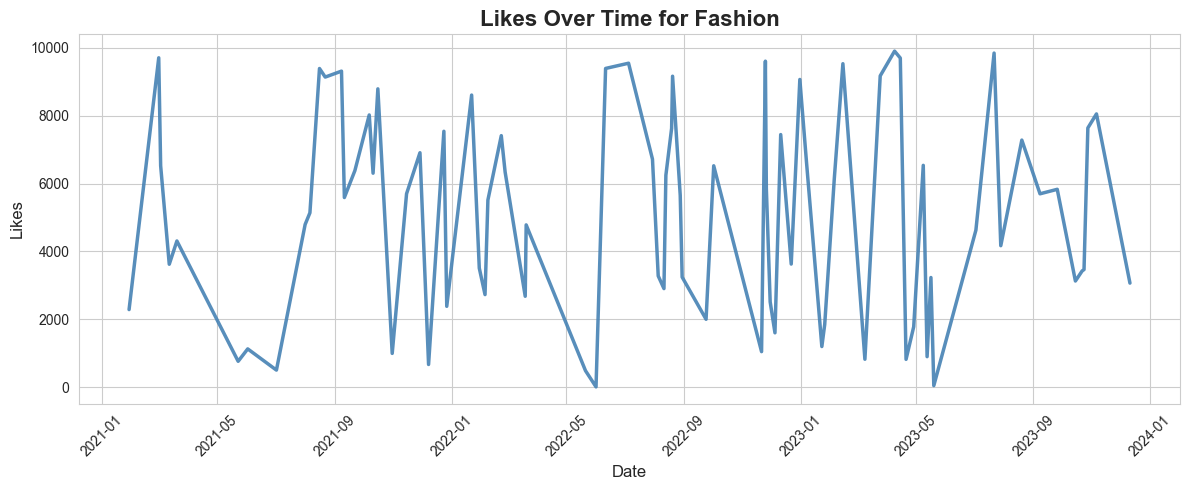

In [8]:

categories = df['Category'].unique()

# Create a separate line plot for each category
for category in categories:
    category_data = df[df['Category'] == category]
    
    # Create a new figure
    plt.figure(figsize=(12, 5))
    
    # Plot the data
    sns.lineplot(x='Date', y='Likes', data=category_data, color='steelblue', linewidth=2.5, alpha=0.9)
    
    
    # Title and labels
    plt.title(f'Likes Over Time for {category}', fontsize=16, fontweight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Likes', fontsize=12)
    
    # Adjust ticks and grid
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True)
    
    # Add data source note
    plt.text(df['Date'].iloc[-1], df['Likes'].max(), '', fontsize=10, ha='right', color='gray')
    
    # Show plot
    plt.tight_layout()
    plt.show()

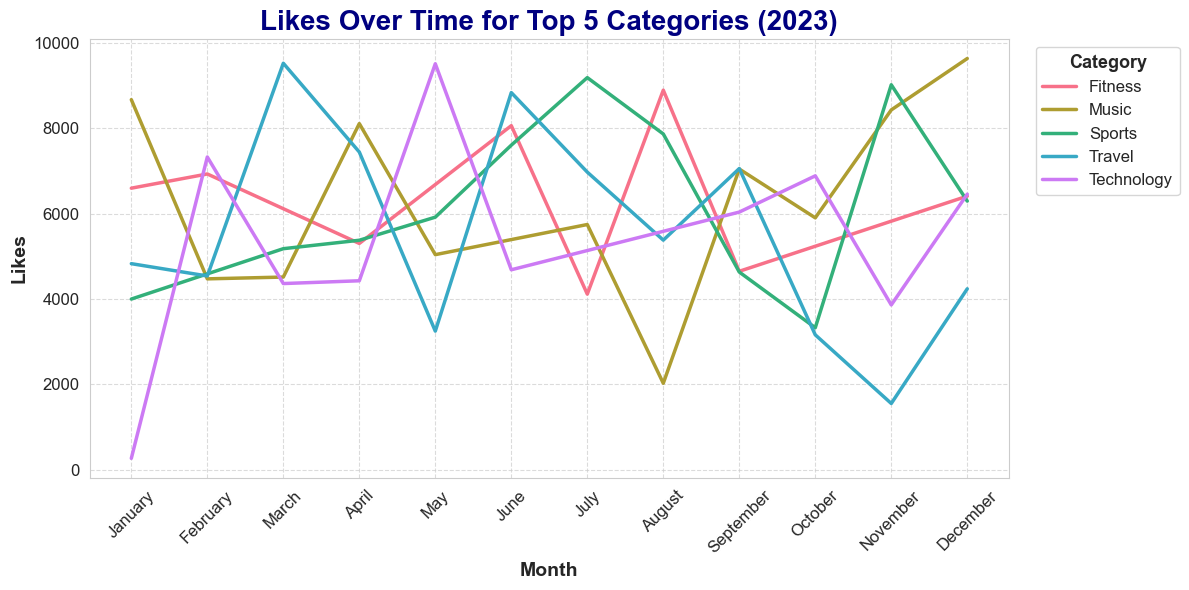

Most liked category among top 5: Culture
Total likes for Culture: 460386

Most popular category among top 5: Culture
Popularity for top 5: 95

Fashion: Total likes - 415424, Popularity - 81
Family: Total likes - 411835, Popularity - 82
Music: Total likes - 376262, Popularity - 66
Sports: Total likes - 370690, Popularity - 73


In [9]:
import calendar 
# Filter the DataFrame for the year 2023
df_2023 = df[df['Date'].dt.year == 2023]

# Calculate mean likes for each category aggregated by month
category_likes_monthly = df_2023.groupby([df_2023['Date'].dt.month, 'Category'])['Likes'].mean().unstack()

# Select the top 5 categories
top_5_categories = category_likes_monthly.mean().nlargest(5).index

# Filter category likes for the top 5 categories
category_likes_top_5 = category_likes_monthly[top_5_categories]

# Set custom color palette
custom_palette = sns.color_palette("husl", len(top_5_categories))

# Set seaborn style
sns.set_style("whitegrid")

# Create a new figure
plt.figure(figsize=(12, 6))

# Plot the combined trends for the top 5 categories for each month
for i, category in enumerate(top_5_categories):
    sns.lineplot(x=category_likes_top_5.index, y=category_likes_top_5[category], label=category, color=custom_palette[i], linewidth=2.5)

# Title and labels
plt.title('Likes Over Time for Top 5 Categories (2023)', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Likes', fontsize=14, fontweight='bold')

# Adjust ticks and grid
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend and data source note
plt.legend(title='Category', title_fontsize='13', fontsize=12, loc='upper left')
plt.text(12.5, df_2023['Likes'].max(), ' ', fontsize=10, ha='right', color='gray')

# Adjust legend frame
plt.gca().get_legend().get_title().set_fontweight('bold')
plt.gca().get_legend().get_title().set_fontsize(13)
plt.gca().get_legend().set_bbox_to_anchor((1.02, 1))

# Show plot
plt.tight_layout()
plt.show()

# Calculate total likes for each category
category_total_likes = df.groupby('Category')['Likes'].sum().sort_values(ascending=False)

# Get the top 5 categories
top_5_categories = category_total_likes.head(5)

# Get the most liked category and its total likes
most_liked_category = top_5_categories.idxmax()
most_likes = top_5_categories.max()

# Print the most liked category and its total likes
print(f"\033[1mMost liked category among top 5:\033[0m {most_liked_category}")
print(f"\033[1mTotal likes for {most_liked_category}:\033[0m {most_likes}\n")

# Calculate popularity by counting the number of occurrences of each category
category_popularity = df['Category'].value_counts().sort_values(ascending=False)

# Get the popularity for the top 5 categories
top_5_popularity = category_popularity[top_5_categories.index]

# Get the most popular category among the top 5
most_popular_category = top_5_popularity.idxmax()
most_popularity = top_5_popularity.max()

# Print the most popular category and its popularity
print(f"\033[1mMost popular category among top 5:\033[0m {most_popular_category}")
print(f"\033[1mPopularity for top 5:\033[0m {most_popularity}\n")

# Print total likes and popularity for other top 5 categories
for category, likes in top_5_categories.items():
    if category != most_liked_category:
        popularity = top_5_popularity[category]
        print(f"{category}: Total likes - {likes}, Popularity - {popularity}")


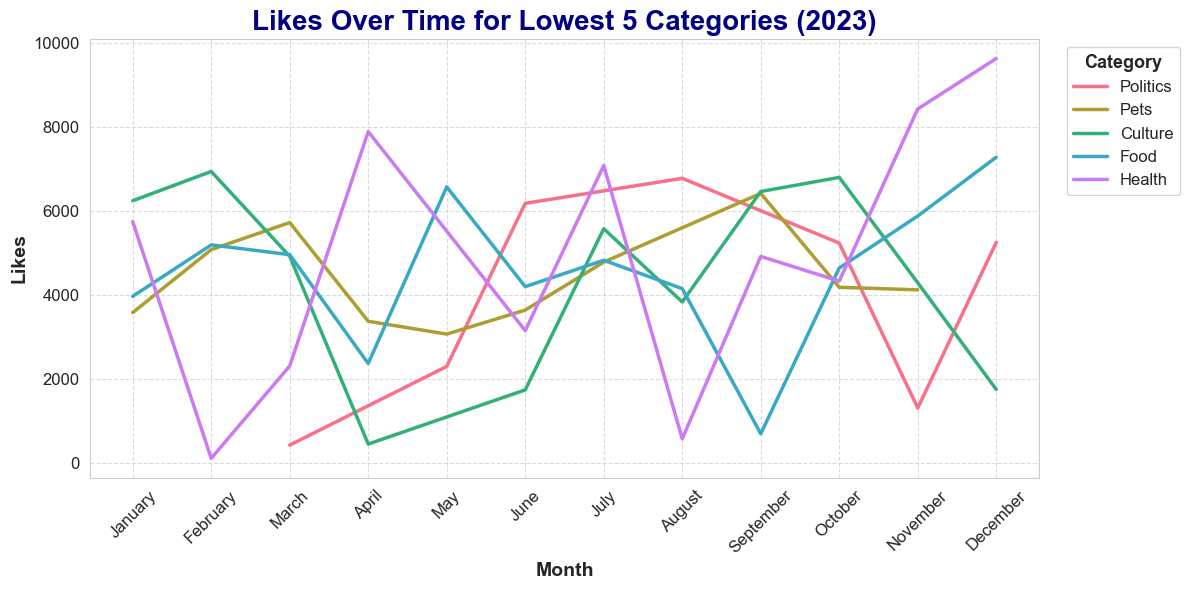

Least liked category among lowest 5: Politics
Total likes for Politics: 284256

Least popular category among lowest 5: Fitness
Popularity for lowest 5: 59

Fitness: Total likes - 310372, Popularity - 59
Food: Total likes - 327740, Popularity - 70
Pets: Total likes - 331696, Popularity - 72
Environment: Total likes - 346033, Popularity - 69


In [10]:
import calendar 

# Filter the DataFrame for the year 2023
df_2023 = df[df['Date'].dt.year == 2023]

# Calculate mean likes for each category aggregated by month
category_likes_monthly = df_2023.groupby([df_2023['Date'].dt.month, 'Category'])['Likes'].mean().unstack()

# Select the lowest 5 categories
lowest_5_categories = category_likes_monthly.mean().nsmallest(5).index

# Filter category likes for the lowest 5 categories
category_likes_lowest_5 = category_likes_monthly[lowest_5_categories]

# Set custom color palette
custom_palette = sns.color_palette("husl", len(lowest_5_categories))

# Set seaborn style
sns.set_style("whitegrid")

# Create a new figure
plt.figure(figsize=(12, 6))

# Plot the combined trends for the lowest 5 categories for each month
for i, category in enumerate(lowest_5_categories):
    sns.lineplot(x=category_likes_lowest_5.index, y=category_likes_lowest_5[category], label=category, color=custom_palette[i], linewidth=2.5)

# Title and labels
plt.title('Likes Over Time for Lowest 5 Categories (2023)', fontsize=20, fontweight='bold', color='navy')
plt.xlabel('Month', fontsize=14, fontweight='bold')
plt.ylabel('Likes', fontsize=14, fontweight='bold')

# Adjust ticks and grid
plt.xticks(range(1, 13), calendar.month_name[1:], rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend and data source note
plt.legend(title='Category', title_fontsize='13', fontsize=12, loc='upper left')
plt.text(12.5, df_2023['Likes'].max(), ' ', fontsize=10, ha='right', color='gray')

# Adjust legend frame
plt.gca().get_legend().get_title().set_fontweight('bold')
plt.gca().get_legend().get_title().set_fontsize(13)
plt.gca().get_legend().set_bbox_to_anchor((1.02, 1))

# Show plot
plt.tight_layout()
plt.show()

# Calculate total likes for each category
category_total_likes = df.groupby('Category')['Likes'].sum().sort_values()

# Get the lowest 5 categories
lowest_5_categories = category_total_likes.head(5)

# Get the least liked category and its total likes
least_liked_category = lowest_5_categories.idxmin()
least_likes = lowest_5_categories.min()

# Print the least liked category and its total likes
print(f"\033[1mLeast liked category among lowest 5:\033[0m {least_liked_category}")
print(f"\033[1mTotal likes for {least_liked_category}:\033[0m {least_likes}\n")

# Calculate popularity by counting the number of occurrences of each category
category_popularity = df['Category'].value_counts().sort_values()

# Get the popularity for the lowest 5 categories
lowest_5_popularity = category_popularity[lowest_5_categories.index]

# Get the least popular category among the lowest 5
least_popular_category = lowest_5_popularity.idxmin()
least_popularity = lowest_5_popularity.min()

# Print the least popular category and its popularity
print(f"\033[1mLeast popular category among lowest 5:\033[0m {least_popular_category}")
print(f"\033[1mPopularity for lowest 5:\033[0m {least_popularity}\n")

# Print total likes and popularity for other lowest 5 categories
for category, likes in lowest_5_categories.items():
    if category != least_liked_category:
        popularity = lowest_5_popularity[category]
        print(f"{category}: Total likes - {likes}, Popularity - {popularity}")



In [11]:
# Calculate mean likes for each category
category_mean_likes = df.groupby('Category')['Likes'].mean()

# Calculate total likes for each category
category_total_likes = df.groupby('Category')['Likes'].sum()

# Calculate popularity for each category
category_popularity = df['Category'].value_counts()

# Create a DataFrame to store the metrics
category_metrics = pd.DataFrame({
    'Mean Likes': category_mean_likes,
    'Total Likes': category_total_likes,
    'Popularity': category_popularity
})

# Sort the DataFrame by mean likes in descending order
category_metrics = category_metrics.sort_values(by='Mean Likes', ascending=False)
category_metrics = category_metrics.sort_values(by='Total Likes', ascending=False)
category_metrics = category_metrics.sort_values(by='Popularity', ascending=False)

# Display the table
print(category_metrics)

              Mean Likes  Total Likes  Popularity
Category                                         
Culture      4846.168421       460386          95
Family       5022.378049       411835          82
Fashion      5128.691358       415424          81
Technology   4863.040000       364728          75
Art          4748.256757       351371          74
Sports       5077.945205       370690          73
Travel       5077.095890       370628          73
Finance      4888.222222       351952          72
Pets         4606.888889       331696          72
Food         4682.000000       327740          70
Environment  5014.971014       346033          69
Health       5284.705882       359360          68
Music        5700.939394       376262          66
Politics     4659.934426       284256          61
Fitness      5260.542373       310372          59


In [12]:
# Calculate mean likes for each category
category_mean_likes = df.groupby('Category')['Likes'].mean()

# Calculate median likes for each category
category_median_likes = df.groupby('Category')['Likes'].median()

# Calculate standard deviation of likes for each category
category_std_likes = df.groupby('Category')['Likes'].std()

# Calculate total likes for each category
category_total_likes = df.groupby('Category')['Likes'].sum()

# Calculate total number of posts for each category
category_total_posts = df['Category'].value_counts()

# Calculate average likes per post for each category
category_avg_likes_per_post = category_total_likes / category_total_posts

# Calculate engagement rate for each category
category_engagement_rate = (category_total_likes / category_total_posts) * 100

# Calculate popularity for each category
category_popularity = df['Category'].value_counts()

# Create a DataFrame to store the metrics
category_metrics = pd.DataFrame({
    'Mean Likes': category_mean_likes,
    'Median Likes': category_median_likes,
    'S.D. Likes': category_std_likes,
    'Total Likes': category_total_likes,
    'AVG Likes per Post': category_avg_likes_per_post,
    'Engagement Rate (%)': category_engagement_rate,
    'Popularity': category_popularity
})

# Sort the DataFrame by mean likes in descending order
category_metrics = category_metrics.sort_values(by='Mean Likes', ascending=False)
category_metrics = category_metrics.sort_values(by='Total Likes', ascending=False)
category_metrics = category_metrics.sort_values(by='Popularity', ascending=False)
category_metrics = category_metrics.sort_values(by='Median Likes', ascending=False)
category_metrics = category_metrics.sort_values(by='Popularity', ascending=False)
# Display the table
print(category_metrics)

              Mean Likes  Median Likes   S.D. Likes  Total Likes  \
Category                                                           
Culture      4846.168421        4749.0  2734.031843       460386   
Family       5022.378049        4634.0  2738.217270       411835   
Fashion      5128.691358        5587.0  3025.741445       415424   
Technology   4863.040000        4479.0  2720.595038       364728   
Art          4748.256757        4072.0  2933.304836       351371   
Travel       5077.095890        5530.0  2768.081642       370628   
Sports       5077.945205        4855.0  2872.006291       370690   
Finance      4888.222222        4886.5  2716.916833       351952   
Pets         4606.888889        4660.0  2740.980618       331696   
Food         4682.000000        4702.5  2730.482938       327740   
Environment  5014.971014        4905.0  2780.129059       346033   
Health       5284.705882        5699.0  2970.677942       359360   
Music        5700.939394        5678.5  2944.948